# Explore here

In [3]:
import pandas as pd

dataset_bank = []

dataset_bank = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep= ";")
dataset_bank.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
dataset_bank.shape

(41188, 21)

In [5]:
dataset_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Eliminar Duplicados

In [6]:
dataset_bank.duplicated().sum()

np.int64(12)

In [7]:
dataset_bank = dataset_bank.drop_duplicates()

In [8]:
dataset_bank.drop(["emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed", "education", "marital", "education", "job"], axis = 1, inplace = True)
dataset_bank.head()

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.conf.idx,y
0,56,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,-36.4,no
1,57,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,-36.4,no
2,37,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,-36.4,no
3,40,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,-36.4,no
4,56,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,-36.4,no


In [9]:
dataset_bank.drop(["day_of_week"], axis = 1, inplace = True)
dataset_bank.head()

,age,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,cons.conf.idx,y
0,56,no,no,no,telephone,may,261,1,999,0,nonexistent,-36.4,no
1,57,unknown,no,no,telephone,may,149,1,999,0,nonexistent,-36.4,no
2,37,no,yes,no,telephone,may,226,1,999,0,nonexistent,-36.4,no
3,40,no,no,no,telephone,may,151,1,999,0,nonexistent,-36.4,no
4,56,no,no,yes,telephone,may,307,1,999,0,nonexistent,-36.4,no


In [10]:
dataset_bank.drop(["contact"], axis = 1, inplace = True)
dataset_bank.head()

,age,default,housing,loan,month,duration,campaign,pdays,previous,poutcome,cons.conf.idx,y
0,56,no,no,no,may,261,1,999,0,nonexistent,-36.4,no
1,57,unknown,no,no,may,149,1,999,0,nonexistent,-36.4,no
2,37,no,yes,no,may,226,1,999,0,nonexistent,-36.4,no
3,40,no,no,no,may,151,1,999,0,nonexistent,-36.4,no
4,56,no,no,yes,may,307,1,999,0,nonexistent,-36.4,no


In [11]:
import pandas as pd
for col in ["default", "housing", "loan", "poutcome", "month"]:
    dataset_bank[col] = pd.factorize(dataset_bank[col])[0]

Analisis de variables univariantes
variables categoricas

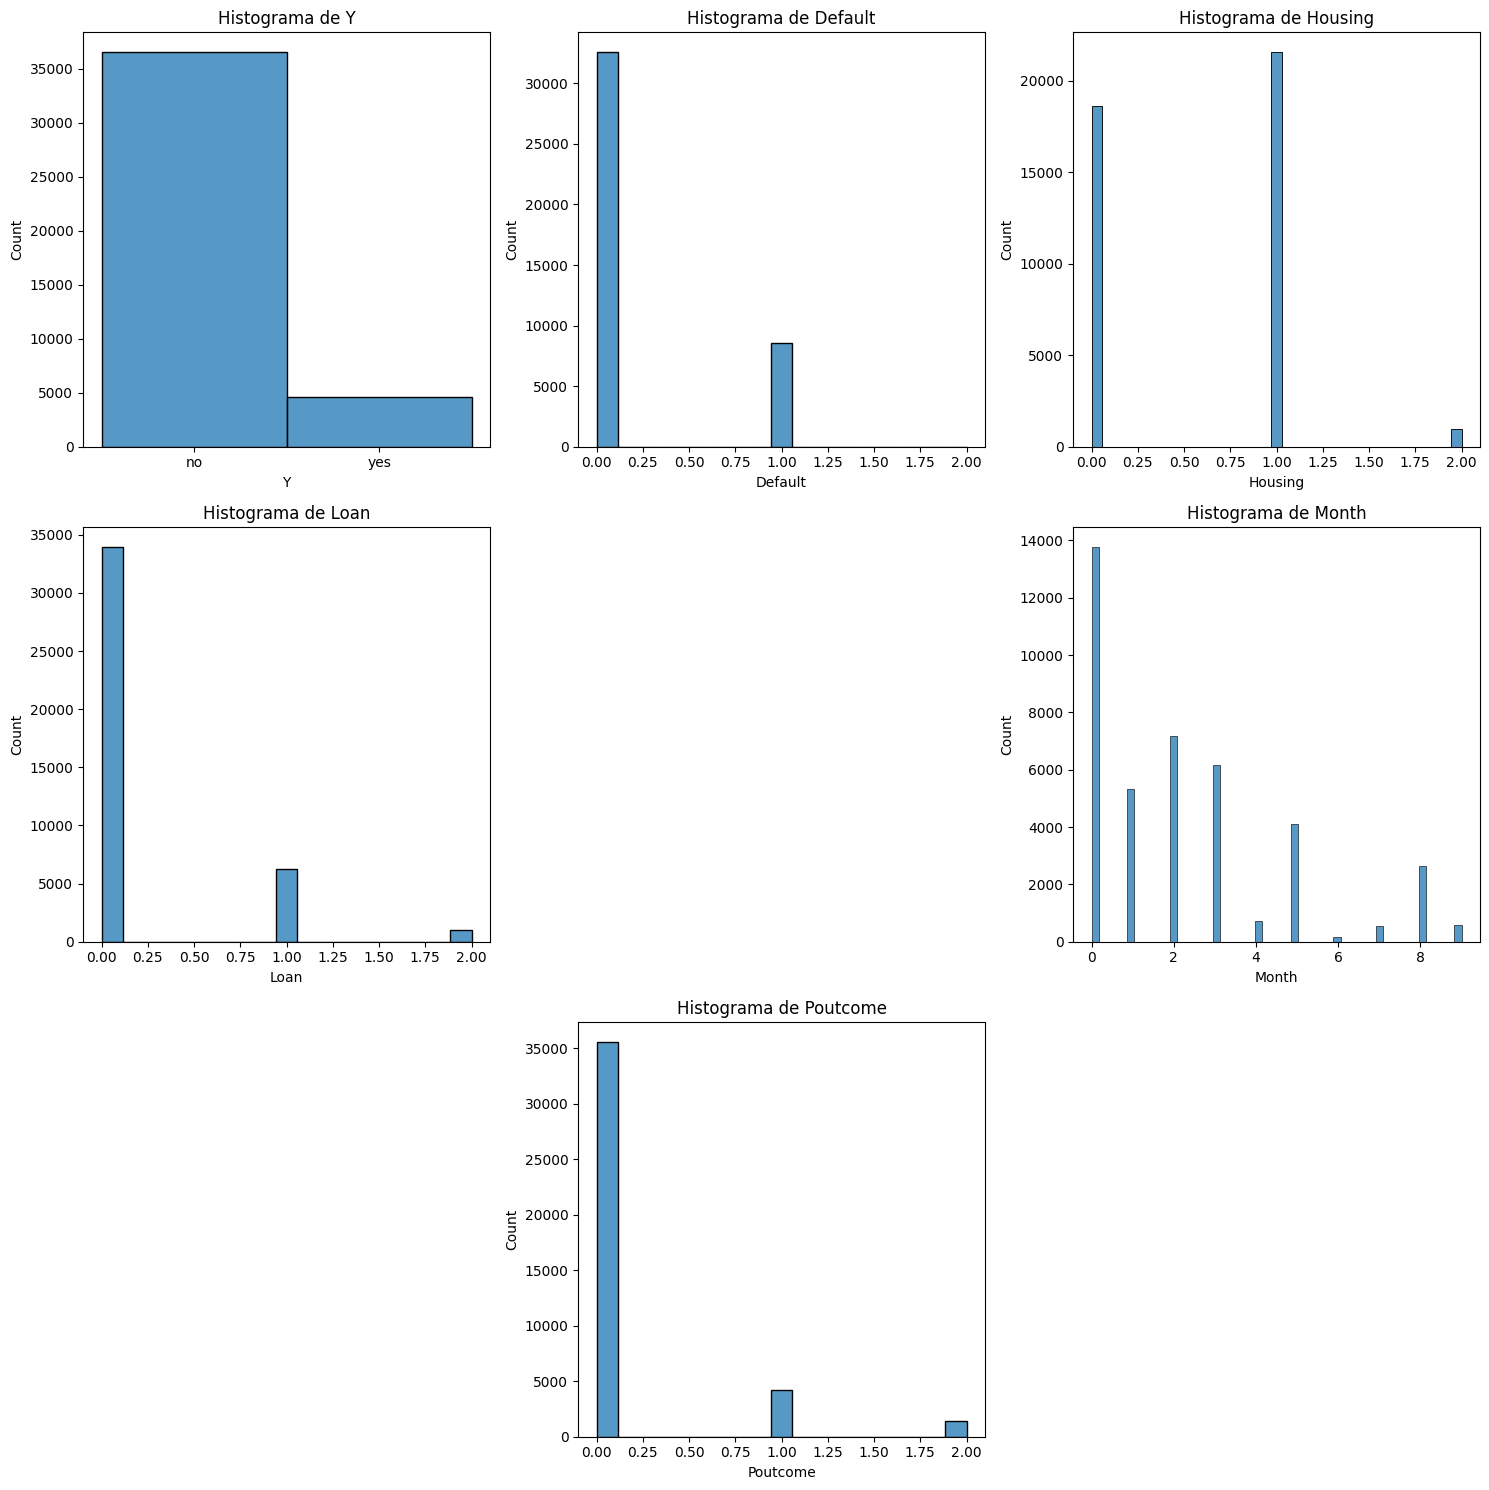

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 3, figsize=(15, 15))

sns.histplot(ax=axis[0, 0], data=dataset_bank, x="y")
axis[0, 0].set_title("Histograma de Y")
axis[0, 0].set_xlabel("Y")
sns.histplot(ax=axis[0, 1], data=dataset_bank, x="default")
axis[0, 1].set_title("Histograma de Default")
axis[0, 1].set_xlabel("Default")
sns.histplot(ax=axis[0, 2], data=dataset_bank, x="housing")
axis[0, 2].set_title("Histograma de Housing")
axis[0, 2].set_xlabel("Housing")
sns.histplot(ax=axis[1, 0], data=dataset_bank, x="loan")
axis[1, 0].set_title("Histograma de Loan")
axis[1, 0].set_xlabel("Loan")
sns.histplot(ax=axis[1, 2], data=dataset_bank, x="month")
axis[1, 2].set_title("Histograma de Month")
axis[1, 2].set_xlabel("Month")
sns.histplot(ax=axis[2, 1], data=dataset_bank, x="poutcome")
axis[2, 1].set_title("Histograma de Poutcome")
axis[2, 1].set_xlabel("Poutcome")
fig.delaxes(axis[1, 1])
fig.delaxes(axis[2, 0])
fig.delaxes(axis[2, 2])

plt.tight_layout()

plt.show()

plt.tight_layout()

plt.show()

En cuanto a la variable Y son mas los clientes que no contratan el deposito a largo plazo que los que si contratan, es considerable la diferencia. 
Para default el gráfico muestra que la mayoría de los casos no tienen Tiene crédito actualmente, y una minoría sí lo tiene, sin valores intermedios o adicionales. Para la variable housing caso similar a default la mayoria de los casos no tienen creditos, misma evaluacion para Loan.
En cuanto a la variable mes, el mes en el que mas contacto se hizo fue el de la ultima campaña siendo mucho menor el contacto en los meses restantes. En cuanto al resultado de la ultima campaña con respecto a otras campañas existe una gran direrencia.

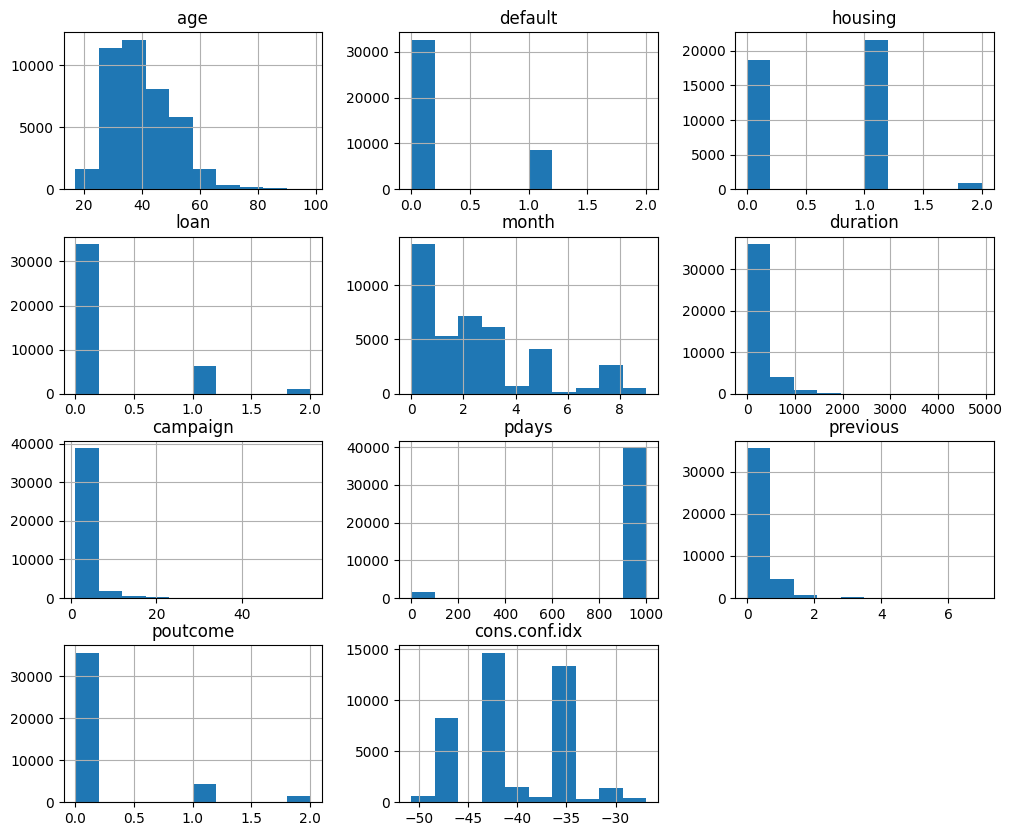

In [13]:
dataset_bank.hist(figsize=(12, 10))
plt.show()




In [14]:
dataset_bank["y"] = pd.factorize(dataset_bank["y"])[0]

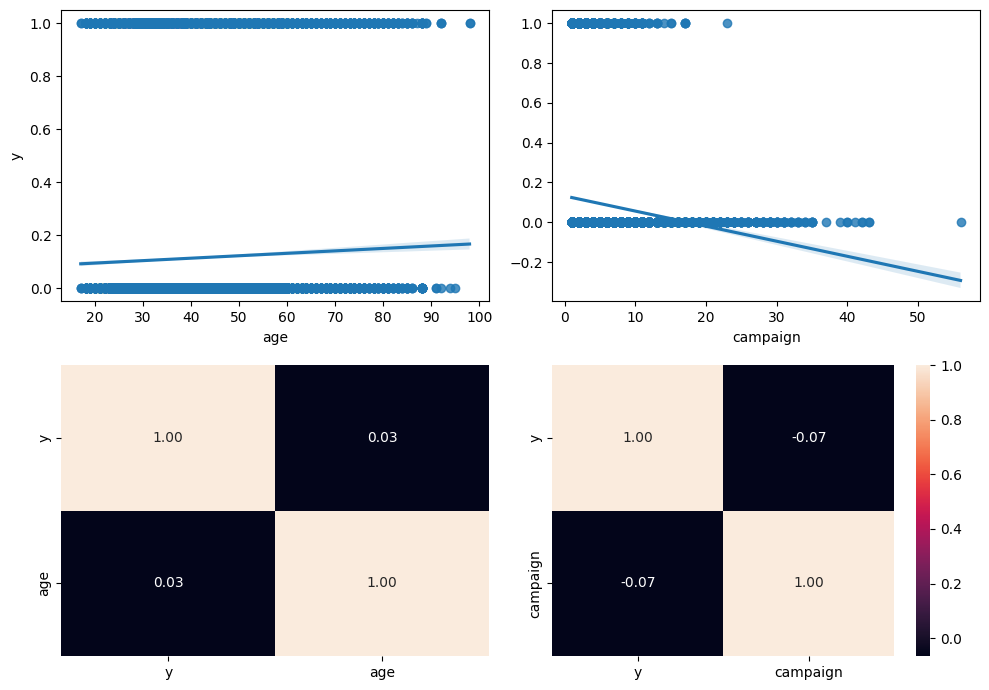

In [15]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = dataset_bank, x = "age", y = "y")
sns.heatmap(dataset_bank[["y", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = dataset_bank, x = "campaign", y = "y").set(ylabel=None)
sns.heatmap(dataset_bank[["y", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

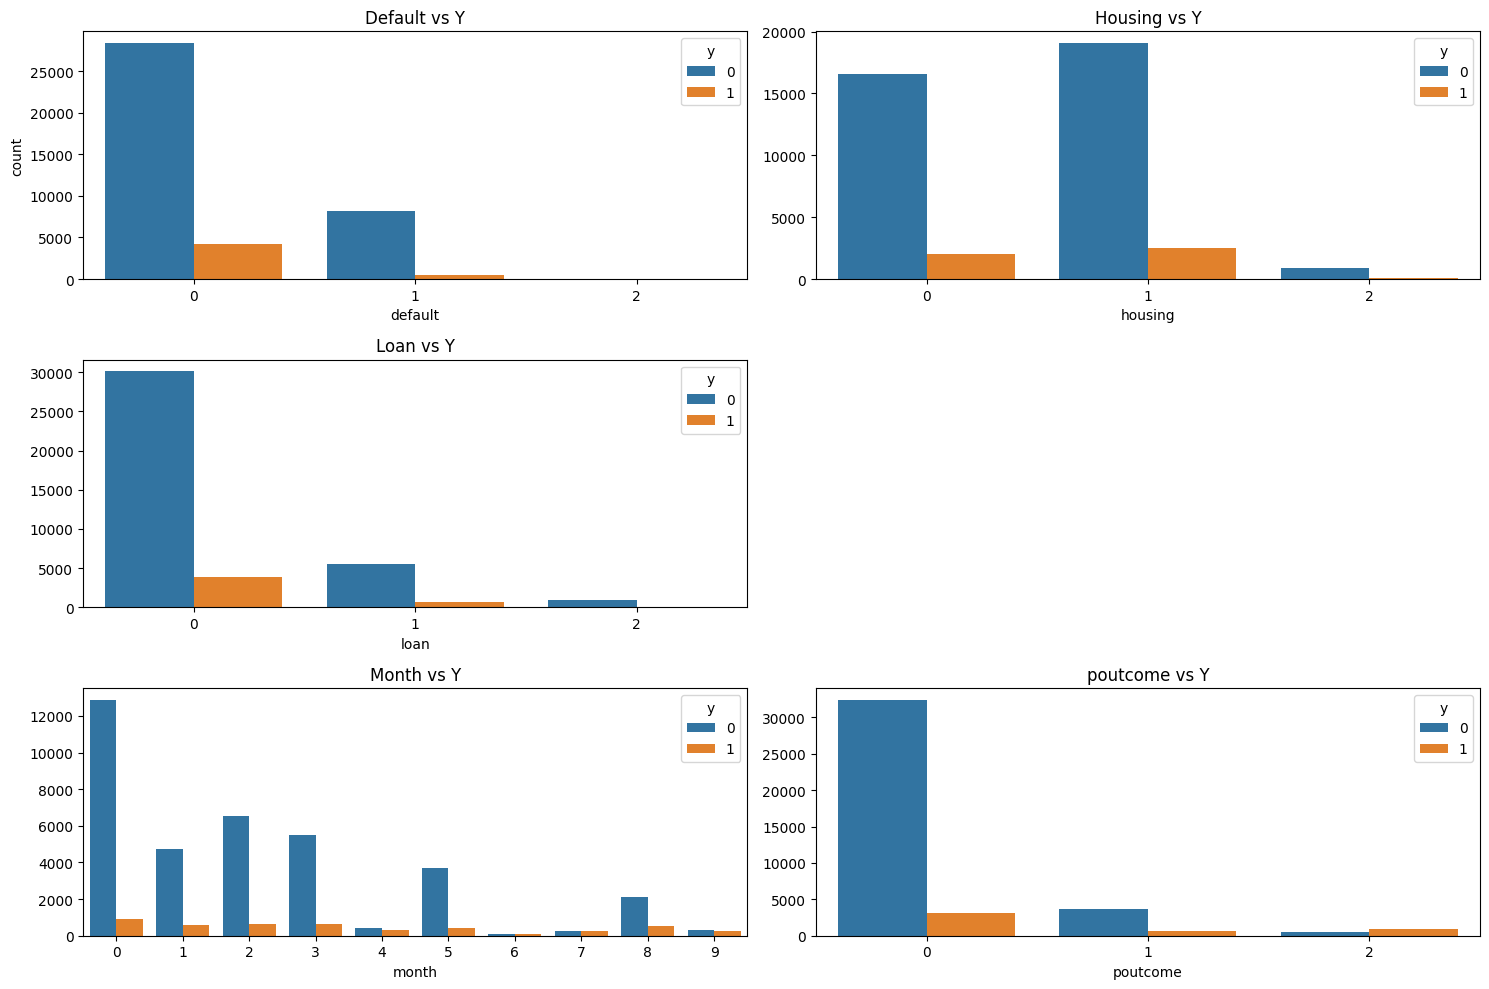

In [16]:
fig, axis = plt.subplots(3, 2, figsize=(15, 10))

sns.countplot(ax=axis[0, 0], data=dataset_bank, x="default", hue="y")
axis[0, 0].set_title("Default vs Y")
sns.countplot(ax=axis[0, 1], data=dataset_bank, x="housing", hue="y").set(ylabel=None)
axis[0, 1].set_title("Housing vs Y")
sns.countplot(ax=axis[1, 0], data=dataset_bank, x="loan", hue="y").set(ylabel=None)
axis[1, 0].set_title("Loan vs Y")
sns.countplot(ax=axis[2, 0], data=dataset_bank, x="month", hue="y").set(ylabel=None)
axis[2, 0].set_title("Month vs Y")
sns.countplot(ax=axis[2, 1], data=dataset_bank, x="poutcome", hue="y").set(ylabel=None)
axis[2, 1].set_title("poutcome vs Y")
fig.delaxes(axis[1, 1])


plt.tight_layout()

plt.show()





Si tiene credito aumenta la probabilidad de que contrate deposito a largo plazo. Si tiene prestamo de vivienda aumenta la probabilidad de que contrate deposito a largo plazo. Si tiene un prestamo personal aumenta la probabilidad de que contrate deposito a largo plazo. Es decir que si el cliente tiene productos adquiridos en el banco tiene mas probabilidad de adquirir deposito a largo plazo. En cuanto al mes y el resultado de la ultima campaña tambien tendran incidencia en la adquicision de este ultimo producto

In [17]:
dataset_bank.head()

,age,default,housing,loan,month,duration,campaign,pdays,previous,poutcome,cons.conf.idx,y
0,56,0,0,0,0,261,1,999,0,0,-36.4,0
1,57,1,0,0,0,149,1,999,0,0,-36.4,0
2,37,0,1,0,0,226,1,999,0,0,-36.4,0
3,40,0,0,0,0,151,1,999,0,0,-36.4,0
4,56,0,0,1,0,307,1,999,0,0,-36.4,0


In [18]:
import pandas as pd
for col in ["default", "housing", "loan", "poutcome", "month"]:
    dataset_bank[col] = pd.factorize(dataset_bank[col])[0]

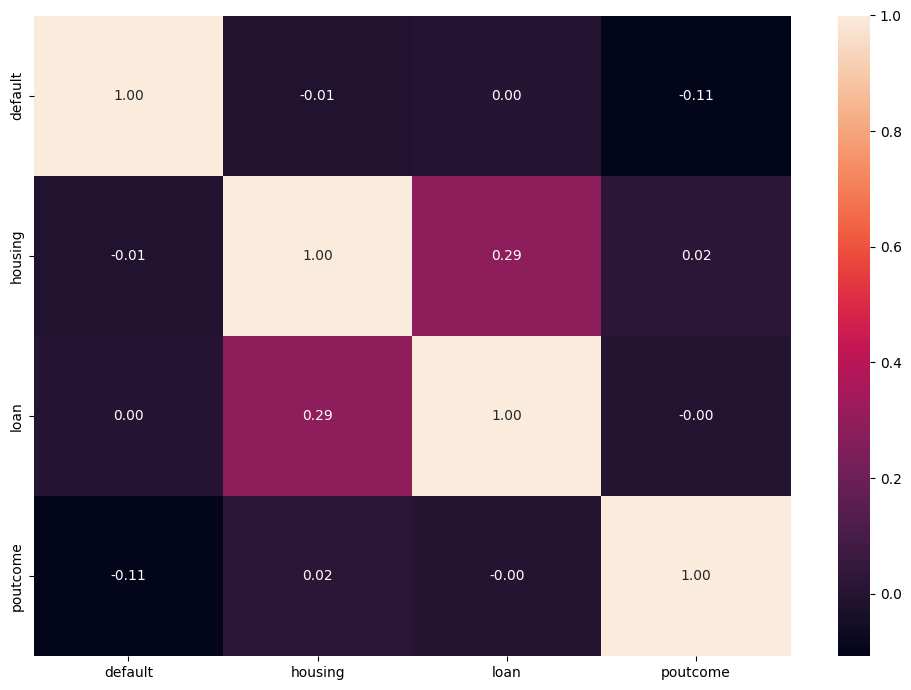

In [19]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(dataset_bank[["default", "housing", "loan", "poutcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

El grafico de correlaciones de variables categoricas muestra que existe relacion entre el resultado de la ultima campaña y la probabilidad de que el cliente contrate el producto. Tambien tienen relacion entre los productos prestamo de vivienda y prestamo personal. Tambien se obserba una relacion entre el ultimo mes de contacto y la probabilidad de contratar el producto

In [20]:
display(dataset_bank.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.0,32.0,38.0,47.0,98.0
default,41176.0,0.208908,0.406713,0.0,0.0,0.0,0.0,2.0
housing,41176.0,0.571959,0.541216,0.0,0.0,1.0,1.0,2.0
loan,41176.0,0.199825,0.456055,0.0,0.0,0.0,0.0,2.0
month,41176.0,2.249951,2.429157,0.0,0.0,2.0,3.0,9.0
duration,41176.0,258.315815,259.305321,0.0,102.0,180.0,319.0,4918.0
campaign,41176.0,2.567879,2.770318,1.0,1.0,2.0,3.0,56.0
pdays,41176.0,962.464810,186.937102,0.0,999.0,999.0,999.0,999.0
previous,41176.0,0.173013,0.494964,0.0,0.0,0.0,0.0,7.0
poutcome,41176.0,0.169953,0.455811,0.0,0.0,0.0,0.0,2.0


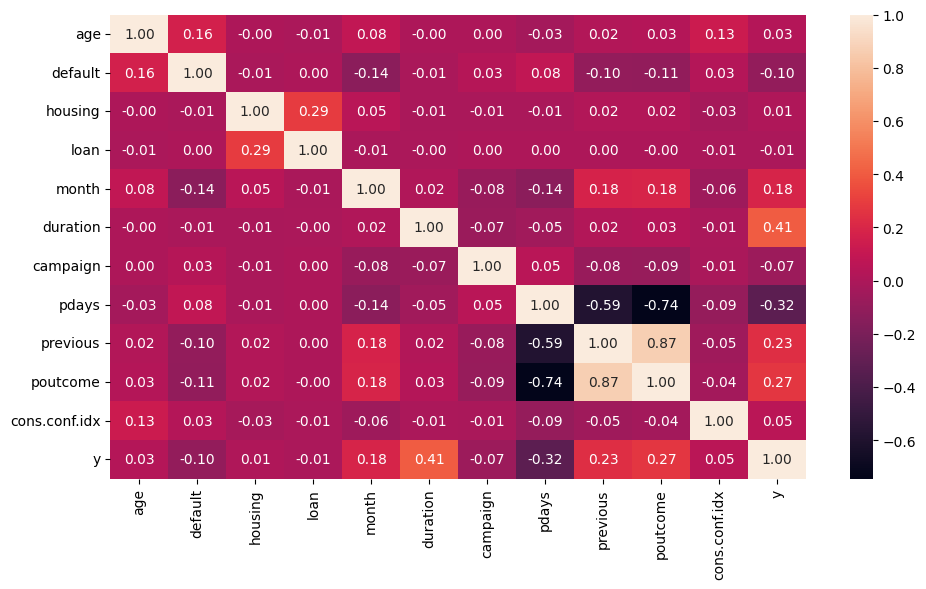

In [21]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(dataset_bank[["age", "default", "housing", "loan", "month", "duration", "campaign", "pdays", "previous", "poutcome", "cons.conf.idx", "y" ]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Fuerte relacion entre el numero de contactos de la campaña anterior y los resultados de la misma lo que estaria indicando la importancia del contacto telefonico. Tambien existe una fuerte relacion entre la duracion del ultimo contacto y la probabilidad de contratacion del producto. relacion entre los productos prestamo personal y prestamo por vivienda que ya lo vimos en el analisis anterior.

In [22]:
display(dataset_bank.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.0,32.0,38.0,47.0,98.0
default,41176.0,0.208908,0.406713,0.0,0.0,0.0,0.0,2.0
housing,41176.0,0.571959,0.541216,0.0,0.0,1.0,1.0,2.0
loan,41176.0,0.199825,0.456055,0.0,0.0,0.0,0.0,2.0
month,41176.0,2.249951,2.429157,0.0,0.0,2.0,3.0,9.0
duration,41176.0,258.315815,259.305321,0.0,102.0,180.0,319.0,4918.0
campaign,41176.0,2.567879,2.770318,1.0,1.0,2.0,3.0,56.0
pdays,41176.0,962.464810,186.937102,0.0,999.0,999.0,999.0,999.0
previous,41176.0,0.173013,0.494964,0.0,0.0,0.0,0.0,7.0
poutcome,41176.0,0.169953,0.455811,0.0,0.0,0.0,0.0,2.0


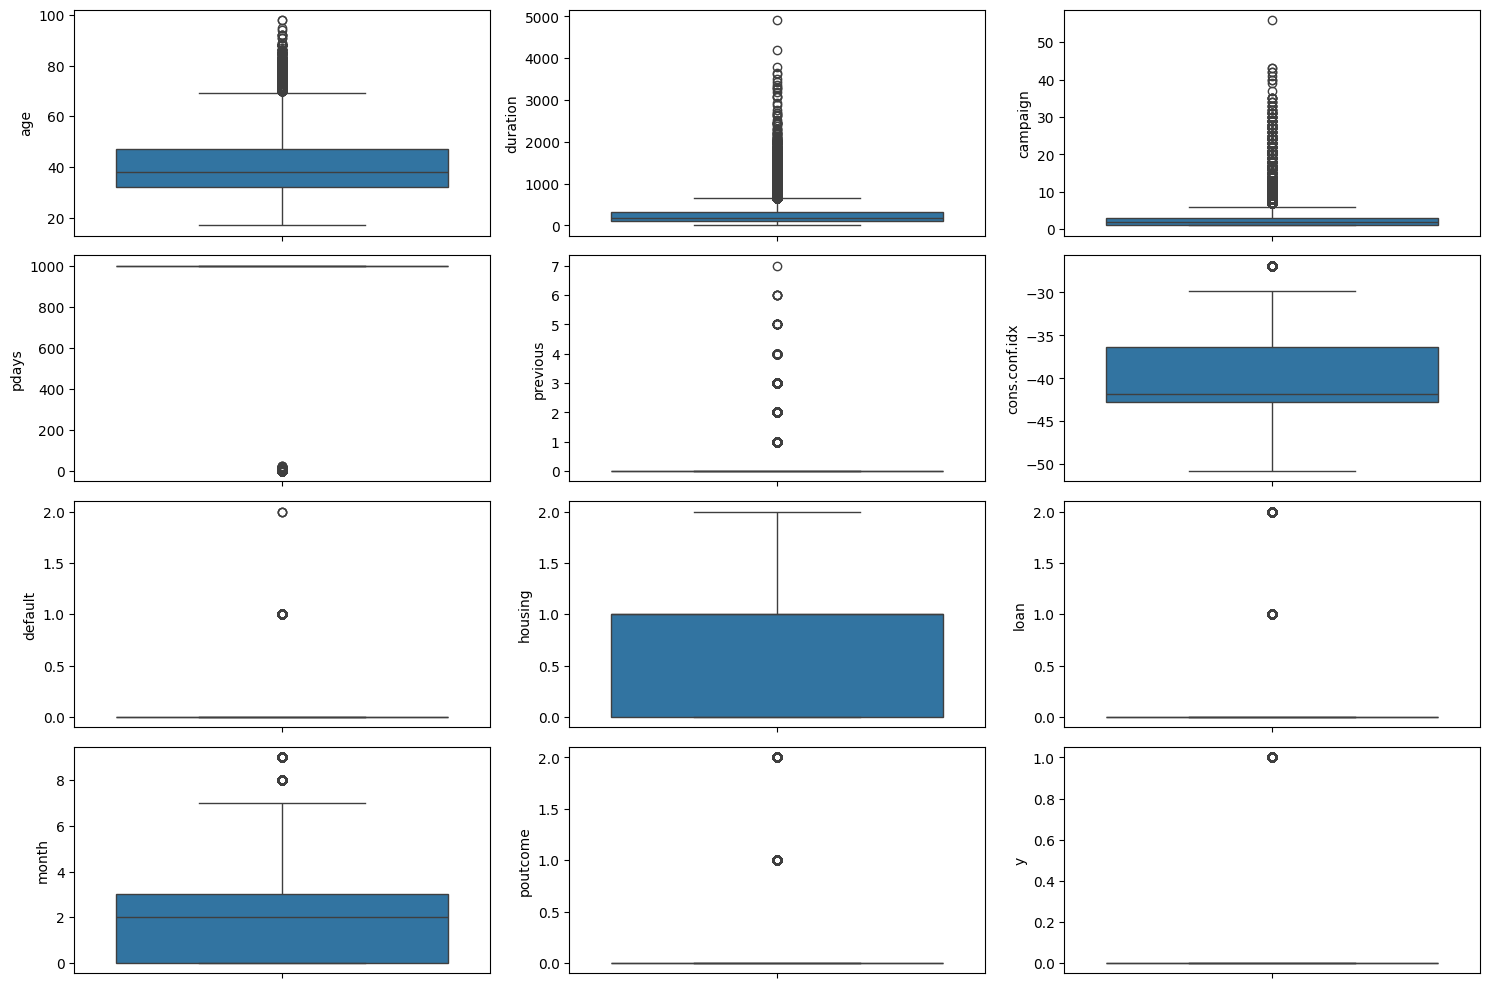

In [23]:
fig, axis = plt.subplots(4, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = dataset_bank, y = "age")
sns.boxplot(ax = axis[0, 1], data = dataset_bank, y = "duration")
sns.boxplot(ax = axis[0, 2], data = dataset_bank, y = "campaign")
sns.boxplot(ax = axis[1, 0], data = dataset_bank, y = "pdays")
sns.boxplot(ax = axis[1, 1], data = dataset_bank, y = "previous")
sns.boxplot(ax = axis[1, 2], data = dataset_bank, y = "cons.conf.idx")
sns.boxplot(ax = axis[2, 0], data = dataset_bank, y = "default")
sns.boxplot(ax = axis[2, 1], data = dataset_bank, y = "housing")
sns.boxplot(ax = axis[2, 2], data = dataset_bank, y = "loan")
sns.boxplot(ax = axis[3, 0], data = dataset_bank, y = "month")
sns.boxplot(ax = axis[3, 1], data = dataset_bank, y = "poutcome")
sns.boxplot(ax = axis[3, 2], data = dataset_bank, y = "y")


plt.tight_layout()

plt.show()

In [24]:
campaign = dataset_bank["campaign"].describe()
# Calcular el IQR
campaign_iqr = campaign["75%"] - campaign["25%"]
# Calcular los límites superior e inferior
upper_limit = campaign["75%"] + 1.5 * campaign_iqr
lower_limit = campaign["25%"] - 1.5 * campaign_iqr
# Imprimir los resultados
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(campaign_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 6.0 y -2.0, con un rango intercuartílico de 2.0


Evaluamos la eliminacion de Outlaiers en campaign: no existe una relacion importante entre la variable objetivo (y) y la variable campaign por lo tanto podemos eliminar sus outlaiers.

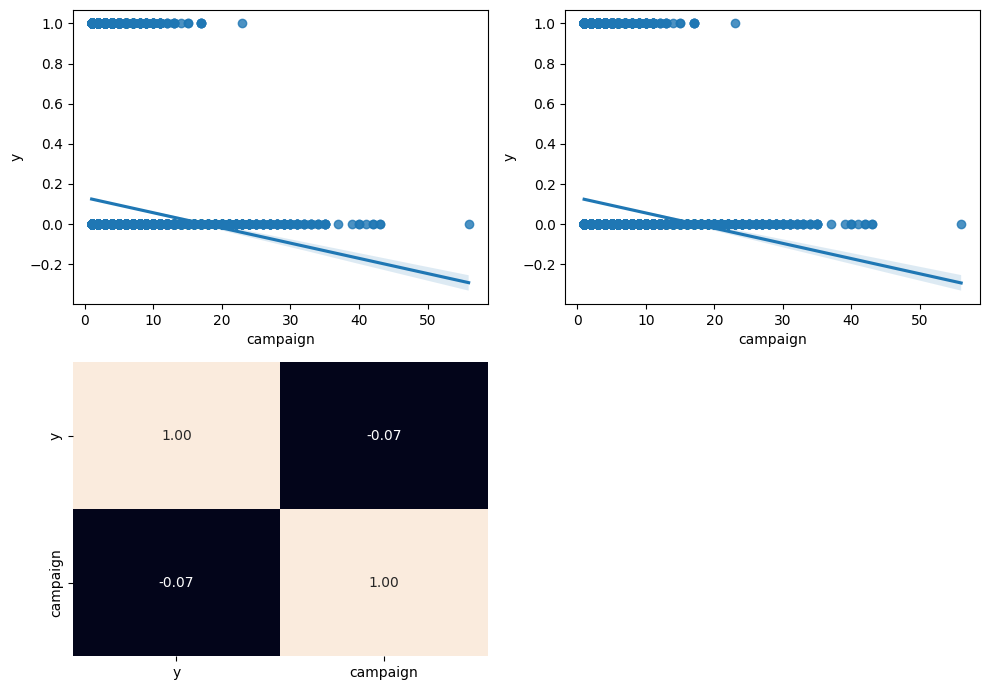

In [25]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = dataset_bank, x = "campaign", y = "y")
sns.heatmap(dataset_bank[["y", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = dataset_bank, x = "campaign", y = "y")

fig.delaxes(axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [26]:
dataset_bank[dataset_bank["campaign"] > 6]

,age,default,housing,loan,month,duration,campaign,pdays,previous,poutcome,cons.conf.idx,y
887,54,0,0,0,0,388,7,999,0,0,-36.4,0
1043,41,1,0,0,0,79,8,999,0,0,-36.4,0
1094,40,0,1,0,0,253,8,999,0,0,-36.4,0
1097,51,1,1,0,0,244,7,999,0,0,-36.4,0
1230,48,0,0,0,0,521,7,999,0,0,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40611,75,0,0,0,9,543,9,999,1,1,-37.5,0
40631,88,0,1,0,9,213,7,999,0,0,-37.5,0
40698,29,0,1,0,9,157,7,3,5,2,-37.5,0
40821,33,0,1,0,9,246,9,999,2,1,-37.5,0


In [27]:
#Eliminamos Outlaiers
dataset_bank = dataset_bank[dataset_bank["campaign"] <= 6]

ANALISIS DE VALORES FALTANTES

In [28]:
dataset_bank.isnull().sum().sort_values(ascending=False)

age              0
default          0
housing          0
loan             0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
cons.conf.idx    0
y                0
dtype: int64

ESCALADO DE VALORES

In [29]:
from sklearn.model_selection import train_test_split
num_variables = ["age", "default", "housing", "loan", "month", "duration", "campaign", "pdays", "previous", "poutcome", "cons.conf.idx"]

X = dataset_bank[num_variables]
y = dataset_bank["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,age,default,housing,loan,month,duration,campaign,pdays,previous,poutcome,cons.conf.idx
27511,54,0,1,0,5,32,2,999,0,0,-42.0
18672,33,0,0,0,2,89,4,999,0,0,-42.7
27490,40,0,0,0,5,608,3,999,0,0,-42.0
9989,28,0,0,0,1,274,2,999,0,0,-41.8
35588,30,0,2,2,0,132,1,999,1,1,-46.2


Normalización

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,age,default,housing,loan,month,duration,campaign,pdays,previous,poutcome,cons.conf.idx
27511,1.341440,-0.511552,0.792645,-0.437731,1.105165,-0.889897,-0.031334,0.199656,-0.355528,-0.379440,-0.321244
18672,-0.671471,-0.511552,-1.056800,-0.437731,-0.114324,-0.668996,1.533637,0.199656,-0.355528,-0.379440,-0.470939
27490,-0.000501,-0.511552,-1.056800,-0.437731,1.105165,1.342366,0.751152,0.199656,-0.355528,-0.379440,-0.321244
9989,-1.150735,-0.511552,-1.056800,-0.437731,-0.520820,0.047964,-0.031334,0.199656,-0.355528,-0.379440,-0.278473
35588,-0.959030,-0.511552,2.642091,3.958857,-0.927316,-0.502351,-0.813819,0.199656,1.639238,1.781543,-1.219418


Escalado Mínimo-Máximo

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,age,default,housing,loan,month,duration,campaign,pdays,previous,poutcome,cons.conf.idx
27511,0.456790,0.0,0.5,0.0,0.555556,0.006507,0.2,1.0,0.000000,0.0,0.368201
18672,0.197531,0.0,0.0,0.0,0.222222,0.018097,0.6,1.0,0.000000,0.0,0.338912
27490,0.283951,0.0,0.0,0.0,0.555556,0.123627,0.4,1.0,0.000000,0.0,0.368201
9989,0.135802,0.0,0.0,0.0,0.111111,0.055714,0.2,1.0,0.000000,0.0,0.376569
35588,0.160494,0.0,1.0,1.0,0.000000,0.026840,0.0,1.0,0.142857,0.5,0.192469


Selección de características

In [32]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,month,duration,pdays,previous,poutcome
0,5.0,32.0,999.0,0.0,0.0
1,2.0,89.0,999.0,0.0,0.0
2,5.0,608.0,999.0,0.0,0.0
3,1.0,274.0,999.0,0.0,0.0
4,0.0,132.0,999.0,1.0,1.0


In [33]:
X_test_sel.head()

,month,duration,pdays,previous,poutcome
0,5.0,186.0,999.0,0.0,0.0
1,0.0,159.0,999.0,0.0,0.0
2,9.0,134.0,999.0,0.0,0.0
3,0.0,80.0,999.0,0.0,0.0
4,3.0,115.0,999.0,0.0,0.0


In [34]:
X_train_sel["y"] = list(y_train)
X_test_sel["y"] = list(y_test)

In [36]:
X_train_sel.to_csv("/workspaces/machine-learning-python-template/data/processed/databank.csv", index=False)
X_test_sel.to_csv("/workspaces/machine-learning-python-template/data/processed/databank.csv", index=False)